# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Busayo Olushola</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Read csv
data = pd.read_csv("https://github.com/busgandy/Global-AI-Hub/blob/main/Lesson%205%20(13-11-20)/Project/data/churn.csv?raw=true")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
data["ContractRenewal"].unique()

array([1, 0])

In [4]:
data["DataPlan"].unique()

array([1, 0])

In [5]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analys missing values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [7]:
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

# Exploratory Data Analysis

In [8]:
# Our label Distribution (countplot)


Text(0.5, 0, 'Churn')

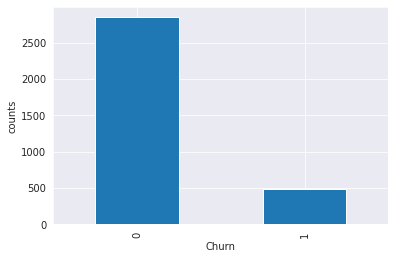

In [9]:
data["Churn"].value_counts().plot.bar()
plt.ylabel('counts')
plt.xlabel('Churn')

Text(0.5, 0, 'ContractRenewal')

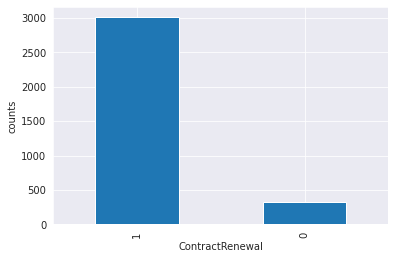

In [10]:
data["ContractRenewal"].value_counts().plot.bar()
plt.ylabel("counts")
plt.xlabel("ContractRenewal")

Text(0.5, 0, 'DataPlan')

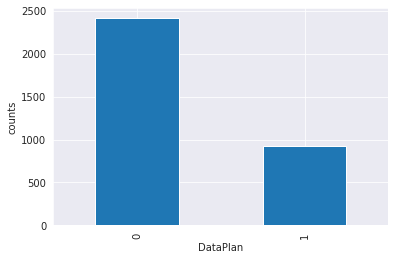

In [11]:
data["DataPlan"].value_counts().plot.bar()
plt.ylabel("counts")
plt.xlabel("DataPlan")

Text(0, 0.5, 'counts')

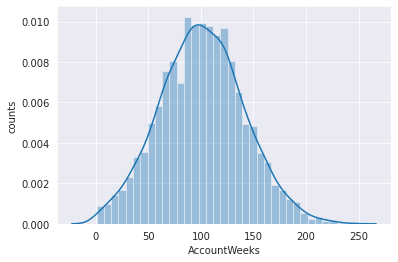

In [12]:
# Example EDA
sns.distplot(data["AccountWeeks"])
plt.ylabel("counts")

Text(0, 0.5, 'counts')

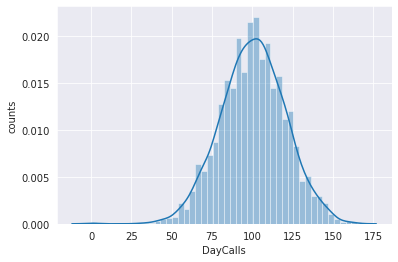

In [13]:
# Example EDA
sns.distplot(data["DayCalls"])
plt.ylabel("counts")

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

1.   **Are there any duplicated values?**

In [14]:
# Check for duplicated values
data.duplicated().sum()

0

No, there are no Duplicated values in the dataset

In [15]:
data.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

2.   **Do we need to do feature scaling?**



Yes, we need feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
std = StandardScaler()

In [18]:
df = std.fit_transform(data.drop(columns = ["Churn","ContractRenewal","DataPlan"]))

In [19]:
df

array([[ 0.67648946,  1.48020373, -0.42793202, ...,  1.99072703,
        -0.0715836 , -0.08500823],
       [ 0.14906505,  2.26607248, -0.42793202, ...,  1.56451025,
        -0.10708191,  1.24048169],
       [ 0.9025285 , -0.64164192, -1.1882185 , ..., -0.26213309,
        -1.57434567,  0.70312091],
       ...,
       [-1.83505538, -0.64164192,  0.33235445, ..., -0.01858065,
         1.73094204,  1.3837779 ],
       [ 2.08295458, -0.64164192,  0.33235445, ..., -0.38390932,
        -0.81704825, -1.87621082],
       [-0.67974475,  2.26607248, -1.1882185 , ...,  2.66049626,
         1.28129669,  1.24048169]])

In [20]:
df1 = pd.DataFrame(columns = ('AccountWeeks','CustServCalls', 'DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins'), data =df)

In [21]:
df1.head()

,AccountWeeks,CustServCalls,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0.676489,1.480204,-0.427932,1.566767,0.476643,1.990727,-0.071584,-0.085008
1,0.149065,2.266072,-0.427932,-0.333738,1.124503,1.564510,-0.107082,1.240482
2,0.902529,-0.641642,-1.188218,1.168304,0.675985,-0.262133,-1.574346,0.703121
3,-0.428590,-0.641642,0.332354,2.196596,-1.466936,0.042307,-2.741846,-1.303026
4,-0.654629,-0.641642,1.092641,-0.240090,0.626149,-0.931902,-1.037927,-0.049184


In [22]:
df1["Churn"] = data["Churn"]

In [23]:
df1["ContractRenewal"] = data["ContractRenewal"]

In [24]:
df1["DataPlan"] = data["DataPlan"]

In [25]:
df1.head()

,AccountWeeks,CustServCalls,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn,ContractRenewal,DataPlan
0,0.676489,1.480204,-0.427932,1.566767,0.476643,1.990727,-0.071584,-0.085008,0,1,1
1,0.149065,2.266072,-0.427932,-0.333738,1.124503,1.564510,-0.107082,1.240482,0,1,1
2,0.902529,-0.641642,-1.188218,1.168304,0.675985,-0.262133,-1.574346,0.703121,0,1,0
3,-0.428590,-0.641642,0.332354,2.196596,-1.466936,0.042307,-2.741846,-1.303026,0,0,0
4,-0.654629,-0.641642,1.092641,-0.240090,0.626149,-0.931902,-1.037927,-0.049184,0,0,0


3. **Do we need to generate new features?**



No, we do not need to generate new features

4.   **Split Train and Test dataset. (0.7/0.3)**



Splitting the dataset into 70% Train and 30% Test

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Churn', axis=1), df1['Churn'], test_size=0.3, random_state=42)


In [28]:
X_test.shape

(1000, 10)

In [29]:
y_train.shape

(2333,)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

**What is machine Learning Model?**

A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.


In [30]:
from concurrent.futures import ThreadPoolExecutor
from sklearn.metrics import classification_report, confusion_matrix

def model_testing(md):
    with ThreadPoolExecutor(max_workers=2) as executor:
        executor.submit(md.fit, X_train, y_train)
    print("Training Accuracy: ", md.score(X_train, y_train), '\n')
    print("Testing Accuracy: ", md.score(X_test, y_test), '\n')
    print(classification_report(y_test, md.predict(X_test)))
    return md.predict(data.drop(columns=['Churn']))


### Using Logistic Regression:

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log = LogisticRegression(solver="liblinear", C=10)

In [33]:
model_testing(log)

Training Accuracy:  0.8576939562794685 

Testing Accuracy:  0.867 

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       857
           1       0.60      0.20      0.30       143

    accuracy                           0.87      1000
   macro avg       0.74      0.59      0.62      1000
weighted avg       0.84      0.87      0.84      1000



array([1, 1, 1, ..., 1, 1, 1])

In [34]:
log.intercept_

array([-0.11086042])

In [35]:
log.coef_

array([[ 0.02252864, -0.34624143,  0.65281114,  0.38528946, -0.00320877,
         0.42808604,  0.22277731,  0.27855759, -2.10606099, -0.84696892]])

In [36]:
log.predict_proba(X_train)

array([[0.72396241, 0.27603759],
       [0.95130788, 0.04869212],
       [0.94455033, 0.05544967],
       ...,
       [0.96294855, 0.03705145],
       [0.89667936, 0.10332064],
       [0.99480863, 0.00519137]])

In [37]:
confusion_matrix(y_train, log.predict(X_train))

array([[1937,   56],
       [ 276,   64]])

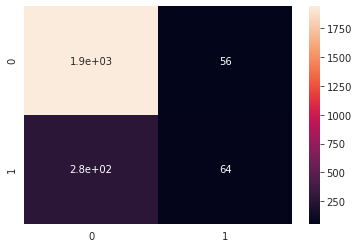

In [38]:
c_matrix = confusion_matrix(y_train, log.predict(X_train))
sns.heatmap(c_matrix, annot=True)

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
gsc = GridSearchCV(estimator = log, param_grid  = {"C": [0.1,0.01,0.001,10,1]}, cv= 5)

In [41]:
gsc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=10, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.01, 0.001, 10, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
gsc.best_params_

{'C': 0.01}

In [43]:
gsc.best_score_

0.859407596658426

In [44]:
gsc.score(X_test, y_test)

0.854

### Using Support Vector:

In [45]:
from sklearn.svm import SVC

In [46]:
svc = SVC(C=10)

In [47]:
model_testing(svc)

Training Accuracy:  0.9537076725246464 

Testing Accuracy:  0.926 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       857
           1       0.82      0.62      0.70       143

    accuracy                           0.93      1000
   macro avg       0.88      0.80      0.83      1000
weighted avg       0.92      0.93      0.92      1000



array([1, 1, 1, ..., 1, 1, 1])

### Using Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier(n_estimators=200)

In [50]:
model_testing(rfc)

Training Accuracy:  1.0 

Testing Accuracy:  0.938 

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       857
           1       0.90      0.64      0.75       143

    accuracy                           0.94      1000
   macro avg       0.92      0.81      0.86      1000
weighted avg       0.94      0.94      0.93      1000



array([0, 0, 0, ..., 0, 0, 0])

In [51]:
rfc.predict_proba(X_train)

array([[0.985, 0.015],
       [0.98 , 0.02 ],
       [0.995, 0.005],
       ...,
       [0.985, 0.015],
       [0.995, 0.005],
       [0.985, 0.015]])

In [52]:
confusion_matrix(y_train, rfc.predict(X_train))

array([[1993,    0],
       [   0,  340]])

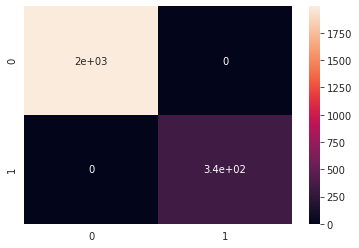

In [53]:
con_matrix = confusion_matrix(y_train, rfc.predict(X_train))
sns.heatmap(con_matrix, annot=True)

### Using KNearest Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier()

In [56]:
model_testing(knn)

Training Accuracy:  0.9177025289327047 

Testing Accuracy:  0.897 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       857
           1       0.87      0.33      0.48       143

    accuracy                           0.90      1000
   macro avg       0.88      0.66      0.71      1000
weighted avg       0.89      0.90      0.88      1000



array([0, 0, 0, ..., 0, 0, 0])

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
gbc = GradientBoostingClassifier()

In [59]:
model_testing(gbc)

Training Accuracy:  0.9558508358336906 

Testing Accuracy:  0.943 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       857
           1       0.89      0.69      0.77       143

    accuracy                           0.94      1000
   macro avg       0.92      0.84      0.87      1000
weighted avg       0.94      0.94      0.94      1000



array([0, 0, 0, ..., 0, 0, 0])

In [60]:
gbc.predict_proba(X_train)

array([[0.9695272 , 0.0304728 ],
       [0.98226016, 0.01773984],
       [0.98200879, 0.01799121],
       ...,
       [0.96899374, 0.03100626],
       [0.97073232, 0.02926768],
       [0.98668541, 0.01331459]])

In [61]:
confusion_matrix(y_train, gbc.predict(X_train))

array([[1980,   13],
       [  90,  250]])

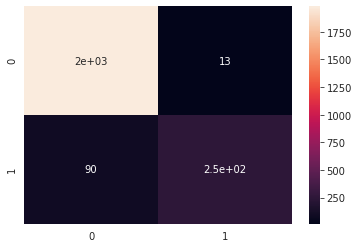

In [62]:
con_matrix = confusion_matrix(y_train, gbc.predict(X_train))
sns.heatmap(con_matrix, annot=True)

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

The best performing model is **Random Forest** with:
Training Accuracy:  1.0 

Testing Accuracy:  0.938



Hypertuning the model would improve it